# Build a regression model: linear and polynomial regression models

## Linear and Polynomial Regression for Pumpkin Pricing - Lesson 3

#### Introduction

So far you have explored what regression is with sample data gathered from the pumpkin pricing dataset that we will use throughout this lesson. You have also visualized it using `ggplot2`.💪

Now you are ready to dive deeper into regression for ML. In this lesson, you will learn more about two types of regression: *basic linear regression* and *polynomial regression*, along with some of the math underlying these techniques.

> Throughout this curriculum, we assume minimal knowledge of math, and seek to make it accessible for students coming from other fields, so watch for notes, 🧮 callouts, diagrams, and other learning tools to aid in comprehension.

#### Preparation

As a reminder, you are loading this data so as to ask questions of it.

-   When is the best time to buy pumpkins?

-   What price can I expect of a case of miniature pumpkins?

-   Should I buy them in half-bushel baskets or by the 1 1/9 bushel box? Let's keep digging into this data.

In the previous lesson, you created a `tibble` (a modern reimagining of the data frame) and populated it with part of the original dataset, standardizing the pricing by the bushel. By doing that, however, you were only able to gather about 400 data points and only for the fall months. Maybe we can get a little more detail about the nature of the data by cleaning it more? We'll see... 🕵️‍♀️

For this task, we'll require the following packages:

-   `tidyverse`: The [tidyverse](https://www.tidyverse.org/) is a [collection of R packages](https://www.tidyverse.org/packages) designed to makes data science faster, easier and more fun!

-   `tidymodels`: The [tidymodels](https://www.tidymodels.org/) framework is a [collection of packages](https://www.tidymodels.org/packages/) for modeling and machine learning.

-   `janitor`: The [janitor package](https://github.com/sfirke/janitor) provides simple little tools for examining and cleaning dirty data.

-   `corrplot`: The [corrplot package](https://cran.r-project.org/web/packages/corrplot/vignettes/corrplot-intro.html) provides a visual exploratory tool on correlation matrix that supports automatic variable reordering to help detect hidden patterns among variables.

You can have them installed as:

`install.packages(c("tidyverse", "tidymodels", "janitor", "corrplot"))`

The script below checks whether you have the packages required to complete this module and installs them for you in case they are missing.

In [1]:
install.packages(c("janitor","corrplot"))

Installing packages into ‘/home/lukmanaliyu/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)

also installing the dependency ‘snakecase’




In [ ]:
suppressWarnings(if (!require("pacman")) install.packages("pacman"))

pacman::p_load(tidyverse, tidymodels, janitor, corrplot)

We'll later load these awesome packages and make them available in our current R session. (This is for mere illustration, `pacman::p_load()` already did that for you)

## 1. A linear regression line

As you learned in Lesson 1, the goal of a linear regression exercise is to be able to plot a *line* *of* *best fit* to:

-   **Show variable relationships**. Show the relationship between variables

-   **Make predictions**. Make accurate predictions on where a new data point would fall in relationship to that line.

To draw this type of line, we use a statistical technique called **Least-Squares Regression**. The term `least-squares` means that all the data points surrounding the regression line are squared and then added up. Ideally, that final sum is as small as possible, because we want a low number of errors, or `least-squares`. As such, the line of best fit is the line that gives us the lowest value for the sum of the squared errors - hence the name *least squares regression*.

We do so since we want to model a line that has the least cumulative distance from all of our data points. We also square the terms before adding them since we are concerned with its magnitude rather than its direction.

> **🧮 Show me the math**
>
> This line, called the *line of best fit* can be expressed by [an equation](https://en.wikipedia.org/wiki/Simple_linear_regression):
>
>     Y = a + bX
>
> `X` is the '`explanatory variable` or `predictor`'. `Y` is the '`dependent variable` or `outcome`'. The slope of the line is `b` and `a` is the y-intercept, which refers to the value of `Y` when `X = 0`.
>

> ![](../images/slope.png "slope = $y/x$")
    Infographic by Jen Looper
>
> First, calculate the slope `b`.
>
> In other words, and referring to our pumpkin data's original question: "predict the price of a pumpkin per bushel by month", `X` would refer to the price and `Y` would refer to the month of sale.
>
> ![](../images/calculation.png)
    Infographic by Jen Looper
> 
> Calculate the value of Y. If you're paying around \$4, it must be April!
>
> The math that calculates the line must demonstrate the slope of the line, which is also dependent on the intercept, or where `Y` is situated when `X = 0`.
>
> You can observe the method of calculation for these values on the [Math is Fun](https://www.mathsisfun.com/data/least-squares-regression.html) web site. Also visit [this Least-squares calculator](https://www.mathsisfun.com/data/least-squares-calculator.html) to watch how the numbers' values impact the line.

Not so scary, right? 🤓

#### Correlation

One more term to understand is the **Correlation Coefficient** between given X and Y variables. Using a scatterplot, you can quickly visualize this coefficient. A plot with datapoints scattered in a neat line have high correlation, but a plot with datapoints scattered everywhere between X and Y have a low correlation.

A good linear regression model will be one that has a high (nearer to 1 than 0) Correlation Coefficient using the Least-Squares Regression method with a line of regression.



## **2. A dance with data: creating a data frame that will be used for modelling**



Load up required libraries and dataset. Convert the data to a data frame containing a subset of the data:

-   Only get pumpkins priced by the bushel

-   Convert the date to a month

-   Calculate the price to be an average of high and low prices

-   Convert the price to reflect the pricing by bushel quantity

> We covered these steps in the [previous lesson](https://github.com/microsoft/ML-For-Beginners/blob/main/2-Regression/2-Data/solution/lesson_2-R.ipynb).

In [2]:
# Load the core Tidyverse packages
library(tidyverse)
library(lubridate)

# Import the pumpkins data
pumpkins <- read_csv(file = "https://raw.githubusercontent.com/microsoft/ML-For-Beginners/main/2-Regression/data/US-pumpkins.csv")


# Get a glimpse and dimensions of the data
glimpse(pumpkins)


# Print the first 50 rows of the data set
pumpkins %>% 
  slice_head(n = 5)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.2.1     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: timechange


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


New names:
• `` -> `...25`
• `` -> `...26`
Rows: 1757 Columns: 26
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (13): City Name, Type, Package, Variety, Sub Variety, Date, Origin, Orig...
dbl  (4): Low Price, High Price, Mostly Low, Mostly High
lgl  (9): Grade, Environment, Quality, Condition, Appearance, Storage, Crop,...

ℹ Use `spec()` to retrieve the full column specification for this data.


Rows: 1,757
Columns: 26
$ `City Name`       <chr> "BALTIMORE", "BALTIMORE", "BALTIMORE", "BALTIMORE", …
$ Type              <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ Package           <chr> "24 inch bins", "24 inch bins", "24 inch bins", "24 …
$ Variety           <chr> NA, NA, "HOWDEN TYPE", "HOWDEN TYPE", "HOWDEN TYPE",…
$ `Sub Variety`     <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ Grade             <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ Date              <chr> "4/29/17", "5/6/17", "9/24/16", "9/24/16", "11/5/16"…
$ `Low Price`       <dbl> 270, 270, 160, 160, 90, 90, 160, 160, 160, 160, 160,…
$ `High Price`      <dbl> 280, 280, 160, 160, 100, 100, 170, 160, 170, 160, 17…
$ `Mostly Low`      <dbl> 270, 270, 160, 160, 90, 90, 160, 160, 160, 160, 160,…
$ `Mostly High`     <dbl> 280, 280, 160, 160, 100, 100, 170, 160, 170, 160, 17…
$ Origin            <chr> "MARYLAND", "MARYLAND", "DELAWARE", "VIRGINIA", "MAR…
$ `Origin Distri

City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,⋯,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,...25,...26
<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<lgl>,<lgl>,<chr>
BALTIMORE,NA,24 inch bins,NA,NA,NA,4/29/17,270,280,270,⋯,NA,NA,NA,NA,NA,NA,E,NA,NA,NA
BALTIMORE,NA,24 inch bins,NA,NA,NA,5/6/17,270,280,270,⋯,NA,NA,NA,NA,NA,NA,E,NA,NA,NA
BALTIMORE,NA,24 inch bins,HOWDEN TYPE,NA,NA,9/24/16,160,160,160,⋯,NA,NA,NA,NA,NA,NA,N,NA,NA,NA
BALTIMORE,NA,24 inch bins,HOWDEN TYPE,NA,NA,9/24/16,160,160,160,⋯,NA,NA,NA,NA,NA,NA,N,NA,NA,NA
BALTIMORE,NA,24 inch bins,HOWDEN TYPE,NA,NA,11/5/16,90,100,90,⋯,NA,NA,NA,NA,NA,NA,N,NA,NA,NA


In the spirit of sheer adventure, let's explore the [`janitor package`](github.com/sfirke/janitor) that provides simple functions for examining and cleaning dirty data. For instance, let's take a look at the column names for our data:

In [3]:
# Return column names
pumpkins %>% 
  names()

[1] "City Name"       "Type"            "Package"         "Variety"        
 [5] "Sub Variety"     "Grade"           "Date"            "Low Price"      
 [9] "High Price"      "Mostly Low"      "Mostly High"     "Origin"         
[13] "Origin District" "Item Size"       "Color"           "Environment"    
[17] "Unit of Sale"    "Quality"         "Condition"       "Appearance"     
[21] "Storage"         "Crop"            "Repack"          "Trans Mode"     
[25] "...25"           "...26"

🤔 We can do better. Let's make these column names `friendR` by converting them to the [snake_case](https://en.wikipedia.org/wiki/Snake_case) convention using `janitor::clean_names`. To find out more about this function: `?clean_names`

In [5]:
# load janitor library
library(janitor)
# Clean names to the snake_case convention
pumpkins <- pumpkins %>% 
  clean_names(case = "snake")

# Return column names
pumpkins %>% 
  names()


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




[1] "city_name"       "type"            "package"         "variety"        
 [5] "sub_variety"     "grade"           "date"            "low_price"      
 [9] "high_price"      "mostly_low"      "mostly_high"     "origin"         
[13] "origin_district" "item_size"       "color"           "environment"    
[17] "unit_of_sale"    "quality"         "condition"       "appearance"     
[21] "storage"         "crop"            "repack"          "trans_mode"     
[25] "x25"             "x26"

Much tidyR 🧹! Now, a dance with the data using `dplyr` as in the previous lesson! 💃


In [7]:
# Select desired columns
pumpkins <- pumpkins %>% 
  select(variety, city_name, package, low_price, high_price, date)



# Extract the month from the dates to a new column
pumpkins <- pumpkins %>%
  mutate(date = mdy(date),
         month = month(date)) %>% 
  select(-date)



# Create a new column for average Price
pumpkins <- pumpkins %>% 
  mutate(price = (low_price + high_price)/2)


# Retain only pumpkins with the string "bushel"
new_pumpkins <- pumpkins %>% 
  filter(str_detect(string = package, pattern = "bushel"))


# Normalize the pricing so that you show the pricing per bushel, not per 1 1/9 or 1/2 bushel
new_pumpkins <- new_pumpkins %>% 
  mutate(price = case_when(
    str_detect(package, "1 1/9") ~ price/(1.1),
    str_detect(package, "1/2") ~ price*2,
    TRUE ~ price))

# Relocate column positions
new_pumpkins <- new_pumpkins %>% 
  relocate(month, .before = variety)


# Display the first 5 rows
new_pumpkins %>% 
  slice_head(n = 5)

month,variety,city_name,package,low_price,high_price,price
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
9,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15,15,13.63636
9,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18,18,16.36364
10,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18,18,16.36364
10,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,17,17,15.45455
10,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15,15,13.63636


Good job!👌 You now have a clean, tidy data set on which you can build your new regression model!

Mind a scatter plot?


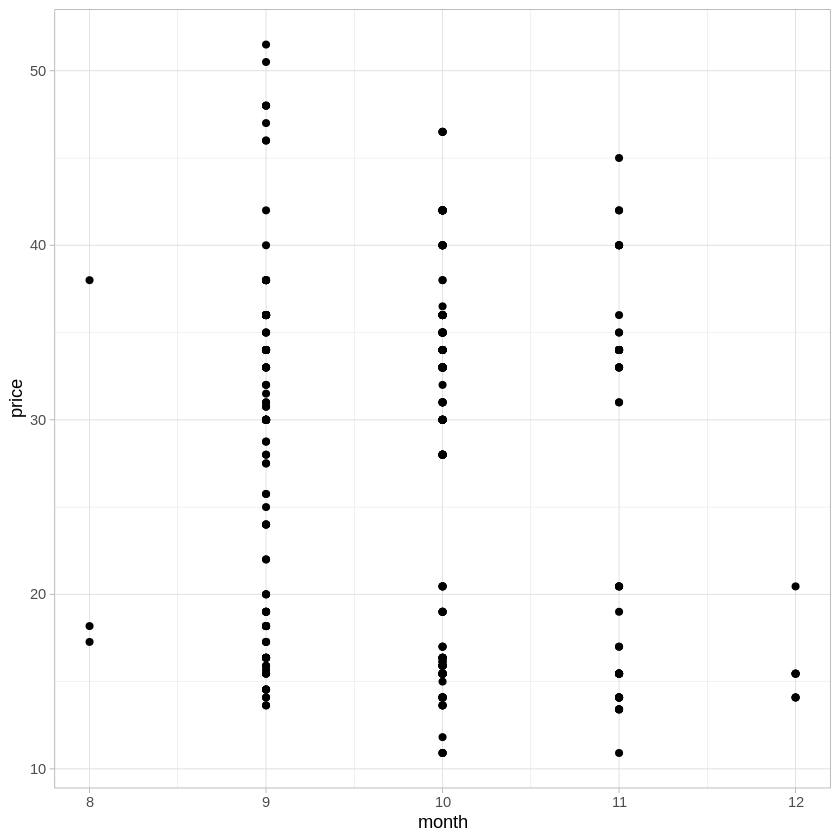

In [8]:
# Set theme
theme_set(theme_light())

# Make a scatter plot of month and price
new_pumpkins %>% 
  ggplot(mapping = aes(x = month, y = price)) +
  geom_point(size = 1.6)


A scatter plot reminds us that we only have month data from August through December. We probably need more data to be able to draw conclusions in a linear fashion.

Let's take a look at our modelling data again:

In [9]:
# Display first 5 rows
new_pumpkins %>% 
  slice_head(n = 5)

month,variety,city_name,package,low_price,high_price,price
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
9,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15,15,13.63636
9,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18,18,16.36364
10,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18,18,16.36364
10,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,17,17,15.45455
10,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15,15,13.63636


What if we wanted to predict the `price` of a pumpkin based on the `city` or `package` columns which are of type character? Or even more simply, how could we find the correlation (which requires both of its inputs to be numeric) between, say, `package` and `price`? 🤷🤷

Machine learning models work best with numeric features rather than text values, so you generally need to convert categorical features into numeric representations.

This means that we have to find a way to reformat our predictors to make them easier for a model to use effectively, a process known as `feature engineering`.

## 3. Preprocessing data for modelling with recipes 👩‍🍳👨‍🍳

Activities that reformat predictor values to make them easier for a model to use effectively has been termed `feature engineering`.

Different models have different preprocessing requirements. For instance, least squares requires `encoding categorical variables` such as month, variety and city_name. This simply involves `translating` a column with `categorical values` into one or more `numeric columns` that take the place of the original.

For example, suppose your data includes the following categorical feature:

|  city   |
|:-------:|
| Denver  |
| Nairobi |
|  Tokyo  |

You can apply *ordinal encoding* to substitute a unique integer value for each category, like this:

| city |
|:----:|
|  0   |
|  1   |
|  2   |

And that's what we'll do to our data!

In this section, we'll explore another amazing Tidymodels package: [recipes](https://tidymodels.github.io/recipes/) - which is designed to help you preprocess your data **before** training your model. At its core, a recipe is an object that defines what steps should be applied to a data set in order to get it ready for modelling.

Now, let's create a recipe that prepares our data for modelling by substituting a unique integer for all the observations in the predictor columns:

In [11]:
# load package
library(tidymodels)
# Specify a recipe
pumpkins_recipe <- recipe(price ~ ., data = new_pumpkins) %>% 
  step_integer(all_predictors(), zero_based = TRUE)


# Print out the recipe
pumpkins_recipe

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Use suppressPackageStartupMessages() to eliminate package startup messages



Recipe

Inputs:

      role #variables
   outcome          1
 predictor          6

Operations:

Integer encoding for all_predictors()

Awesome! 👏 We just created our first recipe that specifies an outcome (price) and its corresponding predictors and that all the predictor columns should be encoded into a set of integers 🙌! Let's quickly break it down:

-   The call to `recipe()` with a formula tells the recipe the *roles* of the variables using `new_pumpkins` data as the reference. For instance the `price` column has been assigned an `outcome` role while the rest of the columns have been assigned a `predictor` role.

-   `step_integer(all_predictors(), zero_based = TRUE)` specifies that all the predictors should be converted into a set of integers with the numbering starting at 0.

We are sure you may be having thoughts such as: "This is so cool!! But what if I needed to confirm that the recipes are doing exactly what I expect them to do? 🤔"

That's an awesome thought! You see, once your recipe is defined, you can estimate the parameters required to actually preprocess the data, and then extract the processed data. You don't typically need to do this when you use Tidymodels (we'll see the normal convention in just a minute-\> `workflows`) but it can come in handy when you want to do some kind of sanity check for confirming that recipes are doing what you expect.

For that, you'll need two more verbs: `prep()` and `bake()` and as always, our little R friends by [`Allison Horst`](https://github.com/allisonhorst/stats-illustrations) help you in understanding this better!



[`prep()`](https://recipes.tidymodels.org/reference/prep.html): estimates the required parameters from a training set that can be later applied to other data sets. For instance, for a given predictor column, what observation will be assigned integer 0 or 1 or 2 etc

[`bake()`](https://recipes.tidymodels.org/reference/bake.html): takes a prepped recipe and applies the operations to any data set.

That said, lets prep and bake our recipes to really confirm that under the hood, the predictor columns will be first encoded before a model is fit.

In [12]:
# Prep the recipe
pumpkins_prep <- prep(pumpkins_recipe)

# Bake the recipe to extract a preprocessed new_pumpkins data
baked_pumpkins <- bake(pumpkins_prep, new_data = NULL)

# Print out the baked data set
baked_pumpkins %>% 
  slice_head(n = 10)

month,variety,city_name,package,low_price,high_price,price
<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,3,1,0,5,3,13.63636
1,3,1,0,10,7,16.36364
2,3,1,0,10,7,16.36364
2,3,1,0,9,6,15.45455
2,3,1,0,5,3,13.63636
2,3,1,0,10,7,16.36364
2,3,1,0,9,6,15.45455
2,3,1,0,9,8,16.13636
2,3,1,0,5,3,13.63636


Woo-hoo!🥳 The processed data `baked_pumpkins` has all it's predictors encoded confirming that indeed the preprocessing steps defined as our recipe will work as expected. This makes it harder for you to read but much more intelligible for Tidymodels! Take some time to find out what observation has been mapped to a corresponding integer.

It is also worth mentioning that `baked_pumpkins` is a data frame that we can perform computations on.

For instance, let's try to find a good correlation between two points of your data to potentially build a good predictive model. We'll use the function `cor()` to do this. Type `?cor()` to find out more about the function.

In [13]:
# Find the correlation between the city_name and the price
cor(baked_pumpkins$city_name, baked_pumpkins$price)

# Find the correlation between the package and the price
cor(baked_pumpkins$package, baked_pumpkins$price)


[1] 0.3236397

[1] 0.6061713

As it turns out, there's only weak correlation between the City and Price. However there's a bit better correlation between the Package and its Price. That makes sense, right? Normally, the bigger the produce box, the higher the price.

While we are at it, let's also try and visualize a correlation matrix of all the columns using the `corrplot` package.

corrplot 0.92 loaded



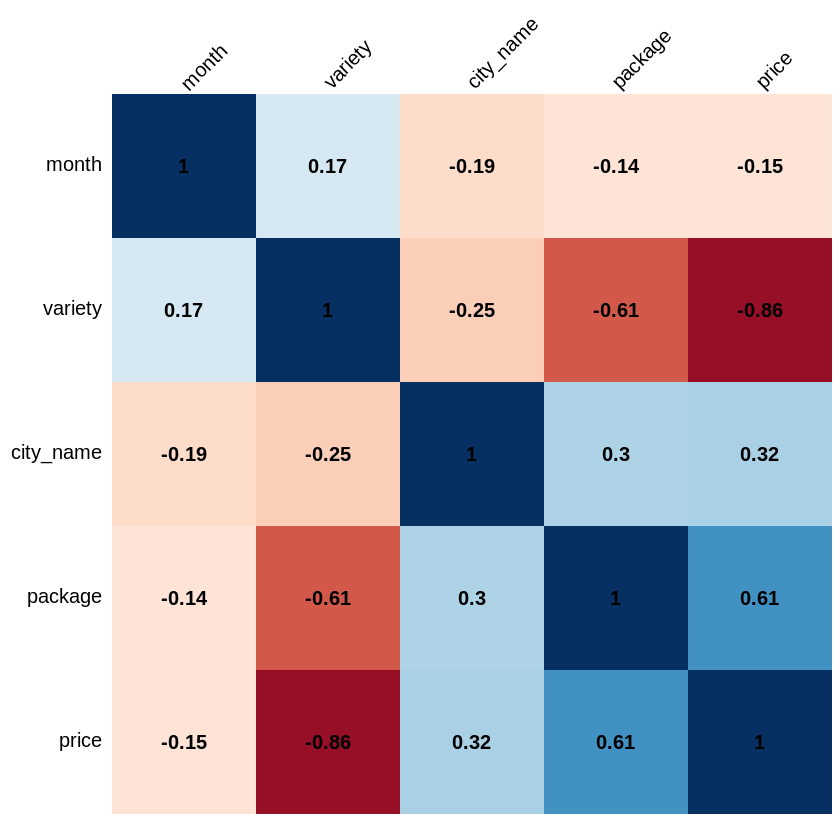

In [14]:
# Load the corrplot package
library(corrplot)

# Obtain correlation matrix
corr_mat <- cor(baked_pumpkins %>% 
                  # Drop columns that are not really informative
                  select(-c(low_price, high_price)))

# Make a correlation plot between the variables
corrplot(corr_mat, method = "shade", shade.col = NA, tl.col = "black", tl.srt = 45, addCoef.col = "black", cl.pos = "n", order = "original")

🤩🤩 Much better.

A good question to now ask of this data will be: '`What price can I expect of a given pumpkin package?`' Let's get right into it!

> Note: When you **`bake()`** the prepped recipe **`pumpkins_prep`** with **`new_data = NULL`**, you extract the processed (i.e. encoded) training data. If you had another data set for example a test set and would want to see how a recipe would pre-process it, you would simply bake **`pumpkins_prep`** with **`new_data = test_set`**

## 4. Build a linear regression model

<p >
   <img src="../../images/linear-polynomial.png"
   width="800"/>
   <figcaption>Infographic by Dasani Madipalli</figcaption>


<!--![Infographic by Dasani Madipalli](../../images/linear-polynomial.png){width="800"}-->

Now that we have build a recipe, and actually confirmed that the data will be pre-processed appropriately, let's now build a regression model to answer the question: `What price can I expect of a given pumpkin package?`

#### Train a linear regression model using the training set

As you may have already figured out, the column *price* is the `outcome` variable while the *package* column is the `predictor` variable.

To do this, we'll first split the data such that 80% goes into training and 20% into test set, then define a recipe that will encode the predictor column into a set of integers, then build a model specification. We won't prep and bake our recipe since we already know it will preprocess the data as expected.

In [15]:
set.seed(2056)
# Split the data into training and test sets
pumpkins_split <- new_pumpkins %>% 
  initial_split(prop = 0.8)


# Extract training and test data
pumpkins_train <- training(pumpkins_split)
pumpkins_test <- testing(pumpkins_split)



# Create a recipe for preprocessing the data
lm_pumpkins_recipe <- recipe(price ~ package, data = pumpkins_train) %>% 
  step_integer(all_predictors(), zero_based = TRUE)



# Create a linear model specification
lm_spec <- linear_reg() %>% 
  set_engine("lm") %>% 
  set_mode("regression")

Good job! Now that we have a recipe and a model specification, we need to find a way of bundling them together into an object that will first preprocess the data (prep+bake behind the scenes), fit the model on the preprocessed data and also allow for potential post-processing activities. How's that for your peace of mind!🤩

In Tidymodels, this convenient object is called a [`workflow`](https://workflows.tidymodels.org/) and conveniently holds your modeling components! This is what we'd call *pipelines* in *Python*.

So let's bundle everything up into a workflow!📦

In [16]:
# Hold modelling components in a workflow
lm_wf <- workflow() %>% 
  add_recipe(lm_pumpkins_recipe) %>% 
  add_model(lm_spec)

# Print out the workflow
lm_wf

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
1 Recipe Step

• step_integer()

── Model ───────────────────────────────────────────────────────────────────────
Linear Regression Model Specification (regression)

Computational engine: lm 



👌 Into the bargain, a workflow can be fit/trained in much the same way a model can.

In [17]:
# Train the model
lm_wf_fit <- lm_wf %>% 
  fit(data = pumpkins_train)

# Print the model coefficients learned 
lm_wf_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
1 Recipe Step

• step_integer()

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)      package  
     19.977        4.884  


From the model output, we can see the coefficients learned during training. They represent the coefficients of the line of best fit that gives us the lowest overall error between the actual and predicted variable.


#### Evaluate model performance using the test set

It's time to see how the model performed 📏! How do we do this?

Now that we've trained the model, we can use it to make predictions for the test_set using `parsnip::predict()`. Then we can compare these predictions to the actual label values to evaluate how well (or not!) the model is working.

Let's start with making predictions for the test set then bind the columns to the test set.

In [18]:
# Make predictions for the test set
predictions <- lm_wf_fit %>% 
  predict(new_data = pumpkins_test)


# Bind predictions to the test set
lm_results <- pumpkins_test %>% 
  select(c(package, price)) %>% 
  bind_cols(predictions)


# Print the first ten rows of the tibble
lm_results %>% 
  slice_head(n = 10)

package,price,.pred
<chr>,<dbl>,<dbl>
1 1/9 bushel cartons,13.63636,19.97666
1 1/9 bushel cartons,15.45455,19.97666
1 1/9 bushel cartons,16.36364,19.97666
1 1/9 bushel cartons,14.54545,19.97666
1 1/9 bushel cartons,14.54545,19.97666
1/2 bushel cartons,34.00000,29.74469
1/2 bushel cartons,30.00000,29.74469
1/2 bushel cartons,33.00000,29.74469
1/2 bushel cartons,30.00000,29.74469



Yes, you have just trained a model and used it to make predictions!🔮 Is it any good, let's evaluate the model's performance!

In Tidymodels, we do this using `yardstick::metrics()`! For linear regression, let's focus on the following metrics:

-   `Root Mean Square Error (RMSE)`: The square root of the [MSE](https://en.wikipedia.org/wiki/Mean_squared_error). This yields an absolute metric in the same unit as the label (in this case, the price of a pumpkin). The smaller the value, the better the model (in a simplistic sense, it represents the average price by which the predictions are wrong!)

-   `Coefficient of Determination (usually known as R-squared or R2)`: A relative metric in which the higher the value, the better the fit of the model. In essence, this metric represents how much of the variance between predicted and actual label values the model is able to explain.

In [19]:
# Evaluate performance of linear regression
metrics(data = lm_results,
        truth = price,
        estimate = .pred)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,7.5563254
rsq,standard,0.4487845
mae,standard,5.8056798


There goes the model performance. Let's see if we can get a better indication by visualizing a scatter plot of the package and price then use the predictions made to overlay a line of best fit.

This means we'll have to prep and bake the test set in order to encode the package column then bind this to the predictions made by our model.

In [ ]:
# Encode package column

package_encode <- lm_pumpkins_recipe %>% 
  prep() %>% 
  bake(new_data = pumpkins_test) %>% 
  select(package)


# Bind encoded package column to the results
lm_results <- lm_results %>% 
  bind_cols(package_encode %>% 
              rename(package_integer = package)) %>% 
  relocate(package_integer, .after = package)


# Print new results data frame
lm_results %>% 
  slice_head(n = 5)


# Make a scatter plot
lm_results %>% 
  ggplot(mapping = aes(x = package_integer, y = price)) +
  geom_point(size = 1.6) +
  # Overlay a line of best fit
  geom_line(aes(y = .pred), color = "orange", linewidth = 1.2) +
  xlab("package")
  


Great! As you can see, the linear regression model does not really well generalize the relationship between a package and its corresponding price.

🎃 Congratulations, you just created a model that can help predict the price of a few varieties of pumpkins. Your holiday pumpkin patch will be beautiful. But you can probably create a better model!

## 5. Build a polynomial regression model

<p >
   <img src="../../images/linear-polynomial.png"
   width="800"/>
   <figcaption>Infographic by Dasani Madipalli</figcaption>


<!--![Infographic by Dasani Madipalli](../../images/linear-polynomial.png){width="800"}-->

Sometimes our data may not have a linear relationship, but we still want to predict an outcome. Polynomial regression can help us make predictions for more complex non-linear relationships.

Take for instance the relationship between the package and price for our pumpkins data set. While sometimes there's a linear relationship between variables - the bigger the pumpkin in volume, the higher the price - sometimes these relationships can't be plotted as a plane or straight line.

> ✅ Here are [some more examples](https://online.stat.psu.edu/stat501/lesson/9/9.8) of data that could use polynomial regression
>
> Take another look at the relationship between Variety to Price in the previous plot. Does this scatterplot seem like it should necessarily be analyzed by a straight line? Perhaps not. In this case, you can try polynomial regression.
>
> ✅ Polynomials are mathematical expressions that might consist of one or more variables and coefficients

#### Train a polynomial regression model using the training set

Polynomial regression creates a *curved line* to better fit nonlinear data.

Let's see whether a polynomial model will perform better in making predictions. We'll follow a somewhat similar procedure as we did before:

-   Create a recipe that specifies the preprocessing steps that should be carried out on our data to get it ready for modelling i.e: encoding predictors and computing polynomials of degree *n*

-   Build a model specification

-   Bundle the recipe and model specification into a workflow

-   Create a model by fitting the workflow

-   Evaluate how well the model performs on the test data

Let's get right into it!


In [30]:
# Specify a recipe
poly_pumpkins_recipe <-
  recipe(price ~ package, data = pumpkins_train) %>%
  step_integer(all_predictors(), zero_based = TRUE) %>% 
  step_poly(all_predictors(), degree = 4)


# Create a model specification
poly_spec <- linear_reg() %>% 
  set_engine("lm") %>% 
  set_mode("regression")


# Bundle recipe and model spec into a workflow
poly_wf <- workflow() %>% 
  add_recipe(poly_pumpkins_recipe) %>% 
  add_model(poly_spec)


# Create a model
poly_wf_fit <- poly_wf %>% 
  fit(data = pumpkins_train)


# Print learned model coefficients
poly_wf_fit

  

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_integer()
• step_poly()

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
   (Intercept)  package_poly_1  package_poly_2  package_poly_3  package_poly_4  
        27.818         104.444        -113.001         -56.399           1.044  


#### Evaluate model performance

👏👏You've built a polynomial model let's make predictions on the test set!

In [ ]:
# Make price predictions on test data
poly_results <- poly_wf_fit %>% predict(new_data = pumpkins_test) %>% 
  bind_cols(pumpkins_test %>% select(c(package, price))) %>% 
  relocate(.pred, .after = last_col())


# Print the results
poly_results %>% 
  slice_head(n = 10)

Woo-hoo, let's evaluate how the model performed on the test_set using `yardstick::metrics()`.

In [ ]:
metrics(data = poly_results, truth = price, estimate = .pred)

🤩🤩 Much better performance.

The `rmse` decreased from about 7. to about 3. an indication that of a reduced error between the actual price and the predicted price. You can *loosely* interpret this as meaning that on average, incorrect predictions are wrong by around \$3. The `rsq` increased from about 0.4 to 0.8.

All these metrics indicate that the polynomial model performs way better than the linear model. Good job!

Let's see if we can visualize this!

In [ ]:
# Bind encoded package column to the results
poly_results <- poly_results %>% 
  bind_cols(package_encode %>% 
              rename(package_integer = package)) %>% 
  relocate(package_integer, .after = package)


# Print new results data frame
poly_results %>% 
  slice_head(n = 5)


# Make a scatter plot
poly_results %>% 
  ggplot(mapping = aes(x = package_integer, y = price)) +
  geom_point(size = 1.6) +
  # Overlay a line of best fit
  geom_line(aes(y = .pred), color = "midnightblue", size = 1.2) +
  xlab("package")


You can see a curved line that fits your data better! 🤩

You can make this more smoother by passing a polynomial formula to `geom_smooth` like this:

In [ ]:
# Make a scatter plot
poly_results %>% 
  ggplot(mapping = aes(x = package_integer, y = price)) +
  geom_point(size = 1.6) +
  # Overlay a line of best fit
  geom_smooth(method = lm, formula = y ~ poly(x, degree = 4), color = "midnightblue", size = 1.2, se = FALSE) +
  xlab("package")

Much like a smooth curve!🤩

Here's how you would make a new prediction:

In [ ]:
# Make a hypothetical data frame
hypo_tibble <- tibble(package = "bushel baskets")

# Make predictions using linear model
lm_pred <- lm_wf_fit %>% predict(new_data = hypo_tibble)

# Make predictions using polynomial model
poly_pred <- poly_wf_fit %>% predict(new_data = hypo_tibble)

# Return predictions in a list
list("linear model prediction" = lm_pred, 
     "polynomial model prediction" = poly_pred)


The `polynomial model` prediction does make sense, given the scatter plots of `price` and `package`! And, if this is a better model than the previous one, looking at the same data, you need to budget for these more expensive pumpkins!

🏆 Well done! You created two regression models in one lesson. In the final section on regression, you will learn about logistic regression to determine categories.

## **🚀Challenge**

Test several different variables in this notebook to see how correlation corresponds to model accuracy.

## [**Post-lecture quiz**](https://gray-sand-07a10f403.1.azurestaticapps.net/quiz/14/)

## **Review & Self Study**

In this lesson we learned about Linear Regression. There are other important types of Regression. Read about Stepwise, Ridge, Lasso and Elasticnet techniques. A good course to study to learn more is the [Stanford Statistical Learning course](https://online.stanford.edu/courses/sohs-ystatslearning-statistical-learning)

If you want to learn more about how to use the amazing Tidymodels framework, please check out the following resources:

-   Tidymodels website: [Get started with Tidymodels](https://www.tidymodels.org/start/)

-   Max Kuhn and Julia Silge, [*Tidy Modeling with R*](https://www.tmwr.org/)*.*

###### **THANK YOU TO:**

[Allison Horst](https://twitter.com/allison_horst?lang=en) for creating the amazing illustrations that make R more welcoming and engaging. Find more illustrations at her [gallery](https://www.google.com/url?q=https://github.com/allisonhorst/stats-illustrations&sa=D&source=editors&ust=1626380772530000&usg=AOvVaw3zcfyCizFQZpkSLzxiiQEM).
